In [11]:
import nltk
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/hyna/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [12]:
from nltk.corpus import movie_reviews
fileids = movie_reviews.fileids() 

reviews = [movie_reviews.raw(fileid) for fileid in fileids]

categories = [movie_reviews.categories(fileid)[0] for fileid in fileids]

print('Reviews count :', len(reviews))
print('Length of the first review ', len(reviews[0]))
print('Labels ', set(categories))

Reviews count : 2000
Length of the first review  4043
Labels  {'pos', 'neg'}


In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

np.random.seed(7)
tf.random.set_seed(7)

max_words = 10000 

tokenizer = Tokenizer(num_words = max_words, oov_token='UNK')
tokenizer.fit_on_texts(reviews)

X = tokenizer.texts_to_sequences(reviews)
print('Lengths of first 10 documents:', [ len(doc) for doc in X[:10]])

Lengths of first 10 documents: [710, 240, 486, 479, 733, 671, 550, 584, 702, 776]


In [15]:
import numpy as np

print("Index of 'the'", tokenizer.word_index["the"])
print("Index of 'review'", tokenizer.word_index["review"])
print("Index of out-of-vocabulary words", tokenizer.word_index["UNK"])

Index of 'the' 2
Index of 'review' 466
Index of out-of-vocabulary words 1


In [19]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = 500

X = pad_sequences(X, maxlen=maxlen, truncating='pre')

In [20]:
import numpy as np

label_dict = {'pos': 1, 'neg':0} # label 값 변환
y = np.array([label_dict[c] for c in categories])
print(set(y))

{0, 1}


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print('Train set count:', len(X_train))
print('Test set count:', len(X_test))
print('Test samples:', y_test[:20])

Train set count: 1600
Test set count: 400
Test samples: [0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1]


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding

model = Sequential([
    Embedding(max_words, 32, input_length=maxlen),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model.summary() # 모델 요약 정보!

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           320000    
                                                                 
 flatten_1 (Flatten)         (None, 16000)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 16001     
                                                                 
Total params: 336001 (1.28 MB)
Trainable params: 336001 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
    epochs=10,
    verbose=1,
    validation_split=0.2)

Epoch 1/10
40/40 [==============================] - 1s 12ms/step - loss: 0.6922 - acc: 0.5055 - val_loss: 0.6900 - val_acc: 0.5125
Epoch 2/10
40/40 [==============================] - 0s 7ms/step - loss: 0.6153 - acc: 0.8852 - val_loss: 0.6820 - val_acc: 0.5750
Epoch 3/10
40/40 [==============================] - 0s 6ms/step - loss: 0.5118 - acc: 0.9641 - val_loss: 0.6658 - val_acc: 0.5813
Epoch 4/10
40/40 [==============================] - 0s 8ms/step - loss: 0.3797 - acc: 0.9906 - val_loss: 0.6435 - val_acc: 0.6250
Epoch 5/10
40/40 [==============================] - 0s 7ms/step - loss: 0.2509 - acc: 0.9961 - val_loss: 0.6199 - val_acc: 0.6344
Epoch 6/10
40/40 [==============================] - 0s 7ms/step - loss: 0.1506 - acc: 0.9984 - val_loss: 0.6073 - val_acc: 0.6594
Epoch 7/10
40/40 [==============================] - 0s 8ms/step - loss: 0.0854 - acc: 1.0000 - val_loss: 0.5988 - val_acc: 0.6625
Epoch 8/10
40/40 [==============================] - 0s 7ms/step - loss: 0.0466 - acc: 0.9

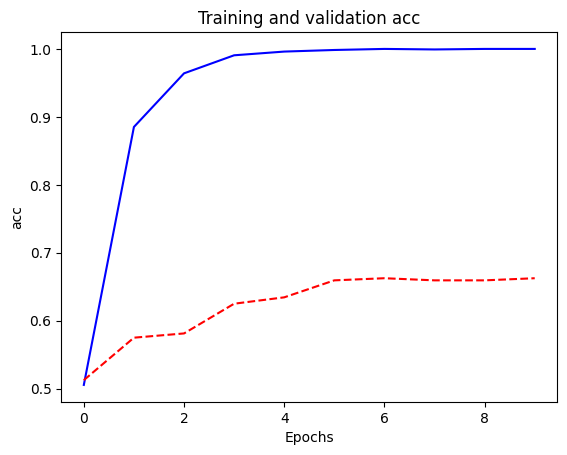

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_results(history, metric):
    plt.plot(history.history[metric], 'b', label='Training ' + metric)
    plt.plot(history.history['val_'+metric], 'r--', label='Validation ' + metric)
    plt.title('Training and validation '+metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)

plot_results(history, 'acc')

In [29]:
score = model.evaluate(X_test, y_test)
print(f'#Test accuracy:{score[1]:.3f}')


13/13 [==============================] - 0s 3ms/step - loss: 0.6403 - acc: 0.6650
#Test accuracy:0.665


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 32)                1056      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 323169 (1.23 MB)
Trainable params: 323169 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
13/13 [==============================] - 1s 29ms/step - loss: 0.7426 - acc: 0.4900
Test accuracy:0.490


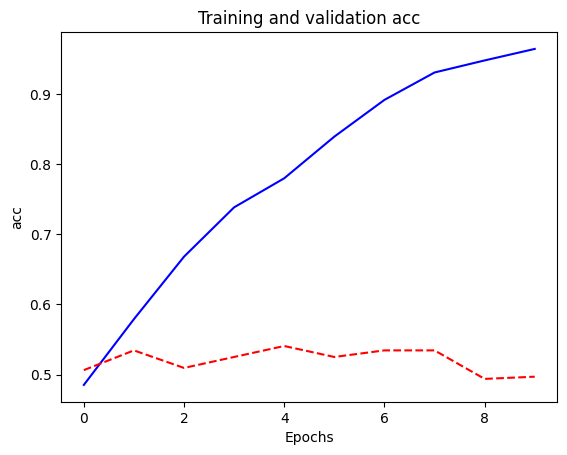

In [42]:
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.optimizers import Adam
model = Sequential([
    Embedding(max_words, 32),
    SimpleRNN(32),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

adam = Adam(learning_rate=1e-4)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train,
            epochs=10,
            verbose=0,
            validation_split=0.2)

plot_results(history, 'acc')

score = model.evaluate(X_test, y_test)

print(f'Test accuracy:{score[1]:.3f}')

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, None, 64)          640000    
                                                                 
 bidirectional_9 (Bidirecti  (None, 128)               66048     
 onal)                                                           
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 714369 (2.73 MB)
Trainable params: 714369 (2.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
13/13 [==============================] - 2s 78ms/step - loss: 0.6124 - acc: 0.7150


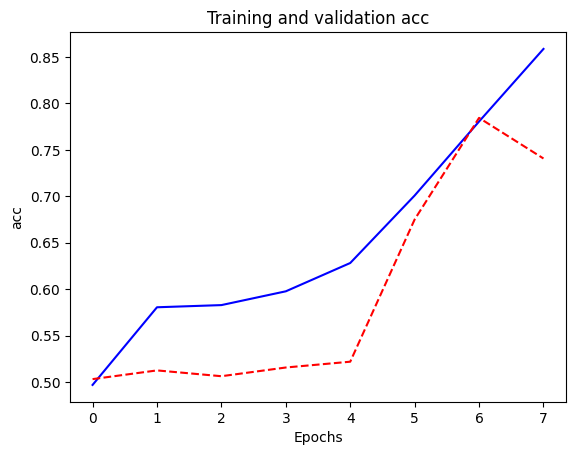

In [44]:
from tensorflow.keras.layers import LSTM, Bidirectional
model = Sequential([
Embedding(max_words, 64),
Bidirectional(LSTM(64)),
Dense(64, activation='relu'),
Dense(1, activation='sigmoid')
])

model.summary()

adam = Adam(learning_rate=1e-4)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=8,
                    verbose=0,
                    validation_split=0.2)

plot_results(history, 'acc')

score = model.evaluate(X_test, y_test)
print(f'#Test accuracy:{score[1]:.3f}')

In [41]:
y_pred = np.round(model.predict(X_test[:10]))
for pred, y_t in zip(y_pred, y_test[:10]):
    print(
        f'predicted value: {pred[0]}, true value: {y_t}, so the prediction is {pred[0] == y_t}'
)

1/1 [==============================] - 1s 936ms/step
predicted value: 1.0, true value: 0, so the prediction is False
predicted value: 1.0, true value: 1, so the prediction is True
predicted value: 1.0, true value: 1, so the prediction is True
predicted value: 1.0, true value: 0, so the prediction is False
predicted value: 0.0, true value: 1, so the prediction is False
predicted value: 1.0, true value: 1, so the prediction is True
predicted value: 1.0, true value: 0, so the prediction is False
predicted value: 1.0, true value: 0, so the prediction is False
predicted value: 1.0, true value: 0, so the prediction is False
predicted value: 0.0, true value: 0, so the prediction is True
